# Neural Network(ニューラルネットワーク)

## 論理ゲートの実装

ニューラルモデル:
$$
y \equiv f\left( x \right) = a \dot x + b
$$

損失関数:

$$
E\left( a, b \right) = \sum _{n=1}^{N}{\left[ 50 - f\left( x_{n} ; a, b \right) \right]^{2}}
$$

In [7]:
import tensorflow as tf

a = tf.Variable(tf.constant(4.0))
x_ph = tf.placeholder(tf.float32)

In [8]:
#  モデル
f = tf.multiply(a, x_ph)
# 損失関数
loss = tf.square(tf.subtract(50.0, f))

In [17]:
# 重み変数を初期化
init_variables = tf.global_variables_initializer()

In [18]:
# 学習アルゴリズムの指定
LR = 0.01
grad_des_op = tf.train.GradientDescentOptimizer(LR)
# 学習実行ノード
train_step = grad_des_op.minimize(loss)

In [19]:
sess =  tf.Session()

sess.run(init_variables)

x_val = 5.0

print('Optimizing a Multiplication Gate Output to 50.0')
for i in range(10):
    # トレーニングステップw実行
    sess.run(train_step, feed_dict={x_ph: x_val})
    # aの値を取得
    a_val = sess.run(a)
    y = sess.run(f, feed_dict={x_ph: x_val})
    print('{y} = {a}×{x}'.format(
            y=str(y),
            a=str(a_val),
            x=str(x_val)
        ))

sess.close()

Optimizing a Multiplication Gate Output to 50.0
35.0 = 7.0×5.0
42.5 = 8.5×5.0
46.25 = 9.25×5.0
48.125 = 9.625×5.0
49.0625 = 9.8125×5.0
49.53125 = 9.90625×5.0
49.765625 = 9.953125×5.0
49.882812 = 9.9765625×5.0
49.941406 = 9.988281×5.0
49.970703 = 9.994141×5.0


## 論理ゲートと活性化関数を操作する

モデル
$$
z = a x + b\\
sigmoid\left( x \right) = \frac {1}{1 + \mathrm {exp}\left( z \right)}\\
ReLU\left( x \right) = \max {\left(0, z\right)}
$$
損失関数
$$
\sum _{n=1}^{N}{\left[0.75 - y\left(x_{n}\right)\right]^{2}}
$$

In [64]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.Session()

# 乱数シードを設定
tf.set_random_seed(5)
np.random.seed(42)

In [65]:
# バッチサイズ
mini_batch_size = 50

# 重み変数(初期値は、正規分からランダム抽出)
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))

a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))

# データセット(平均2,　標準偏差0.1)
N = 500
x = np.random.normal(2, 0.1, 500)

x_ph = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [66]:
# 活性化関数
sigmoid_activation = tf.sigmoid(
        tf.add(
            tf.multiply(x_ph, a1),
            b1
        )
    )

relu_activation = tf.nn.relu(
        tf.add(
            tf.multiply(x_ph, a2),
            b2
        )
    )

In [67]:
# 損失関数
y_true = 0.75
loss1 = tf.reduce_mean(tf.square(tf.subtract(y_true, sigmoid_activation)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(y_true, relu_activation)))

In [68]:
# 最適化アルゴリズム
LR = 0.01
train_alg = tf.train.GradientDescentOptimizer(LR)
train_step_sigmoid = train_alg.minimize(loss1)
train_step_relu = train_alg.minimize(loss2)

In [69]:
# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

２つのモデルで、500回の繰り返し処理を行うトレーニンググループを開始する。

In [70]:
loss_vec_sigmoid = []
loss_vec_relu = []
activation_sigmoid = []
activation_relu = []

loop_size = 500

for i in range(loop_size):
    # バッチを洗濯するためのインデックスをランダム抽出
    indices = np.random.choice(len(x), size=mini_batch_size)
    x_vals = np.transpose([x[indices]])
    # トレーニングステップを実行
    sess.run(train_step_sigmoid, feed_dict={x_ph : x_vals})
    sess.run(train_step_relu, feed_dict={x_ph : x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_ph: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_ph: x_vals}))
    
    activation_sigmoid.append(np.mean(sess.run(sigmoid_activation, feed_dict={x_ph: x_vals})))
    activation_relu.append(np.mean(sess.run(relu_activation, feed_dict={x_ph: x_vals})))

活性化関数の出力と損失関数の出力をプロットする

/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['[IPAexGothic]'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


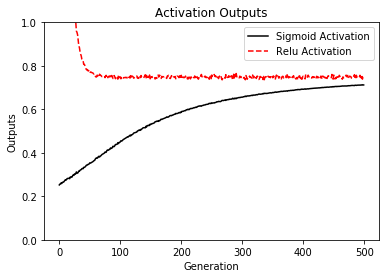

In [71]:
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(activation_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()

/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['[IPAexGothic]'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


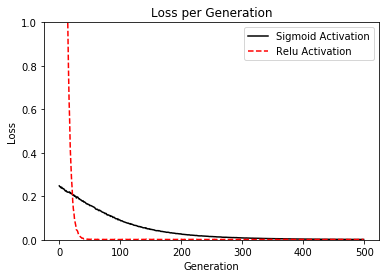

In [72]:
# Plot the loss
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## 単層ニューラルネットワークを実装する

### モデル
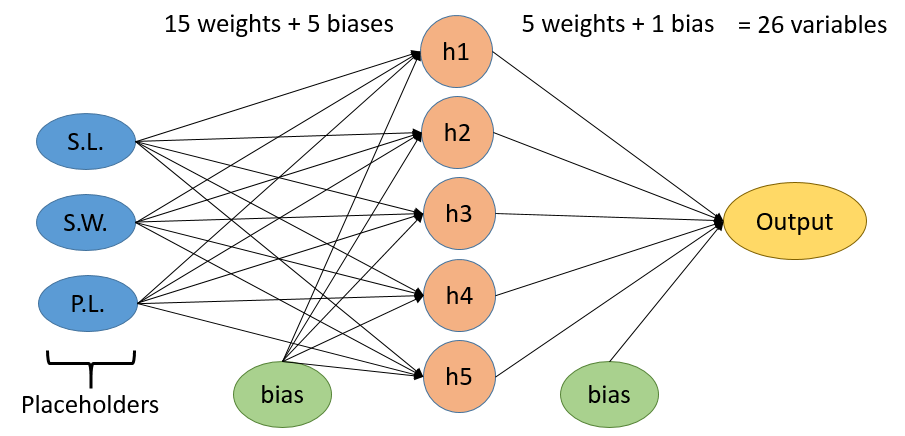

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [102]:
iris = datasets.load_iris()
# iris.data = [(がく片の長さ, がく片の幅, 花びらの長さ, 花びらの幅)]
feature_arr = np.array([x[0:3] for x in iris.data])
teacher_arr = np.array([x[3] for x in iris.data])

In [103]:
sess = tf.Session()

In [104]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [105]:
# 学習データ、検証データと分ける
train_ratio = 0.8
train_indices = np.random.choice(len(feature_arr), round(len(feature_arr) * train_ratio), replace=False)
test_indices = np.array(list(set(range(len(feature_arr))) - set(train_indices)))

train_x = feature_arr[train_indices]
test_x = feature_arr[test_indices]
train_y = teacher_arr[train_indices]
test_y = teacher_arr[test_indices]

In [106]:
# データの正規化

def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

train_x = np.nan_to_num(normalize_cols(train_x))
test_x = np.nan_to_num(normalize_cols(test_x))

In [107]:
mini_batch_size = 50

x_ph = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_ph = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [108]:
# 中間層の指定
hidden_layer_nodes = 10

# 入力層 → 中間層
A1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))  # 中間層のノードごとに１つのバイアス

# 中間層 → 1つの出力
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))   # 出力のバイアス

このモデルは、「３つの特徴量」を入力し、「中間層の10個のノード」を経て、「１つの出力値」を生成する。

In [109]:
# 中間層の出力
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_ph, A1), b1))
# 出力層の出力
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

# 平均二乗誤差(MSE)
loss = tf.reduce_mean(tf.square(y_ph - final_output))

# 学習アルゴリズム
LR = 0.005
opt_alg = tf.train.GradientDescentOptimizer(LR)
train_step = opt_alg.minimize(loss)

In [110]:
init = tf.global_variables_initializer()
sess.run(init)

In [111]:
loss_vec = []
test_loss = []

epochs = 500
for i in range(epochs):
    rand_index = np.random.choice(len(train_x), size=mini_batch_size)
    rand_x = train_x[rand_index]
    rand_y = np.transpose([train_y[rand_index]])
    sess.run(train_step, feed_dict={x_ph: rand_x, y_ph: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_ph: rand_x, y_ph: rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    test_temp_loss = sess.run(loss, feed_dict={x_ph: test_x, y_ph: np.transpose([test_y])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%50==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))

Generation: 50. Loss = 2.219689
Generation: 100. Loss = 2.000401
Generation: 150. Loss = 2.451553
Generation: 200. Loss = 2.2086065
Generation: 250. Loss = 1.9736218
Generation: 300. Loss = 2.7554634
Generation: 350. Loss = 1.7847081
Generation: 400. Loss = 1.5559094
Generation: 450. Loss = 2.1569753
Generation: 500. Loss = 2.0433245


/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['[IPAexGothic]'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


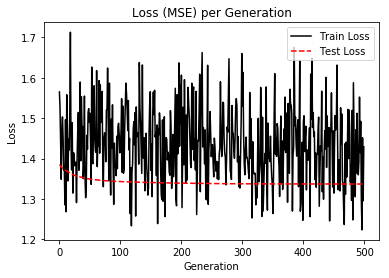

In [112]:
%matplotlib inline
# Plot loss (MSE) over time
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()